In [137]:
from PIL import Image, ImageSequence
import vidaug.augmentors as va

In [359]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()
path = os.path.join(cwd,'datasets')
jap = os.path.join(path,'jap')
vid1 = os.listdir(jap)[0]


vid1

'1.avi'

In [369]:
def vid_loader(path,showimg=False):
    frames = []
    cap = cv2.VideoCapture(path)
    fps = cap.get(cv2.CAP_PROP_FPS) 
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('number of frames = ' + str(frame_count))

    for k in range(int(frame_count)):
        ret, frame = cap.read()
        frame=cv2.resize(frame,(128,128),interpolation=cv2.INTER_AREA)
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        if showimg:
            plt.imshow(gray)
            plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
            plt.show()
        frames.append(rgb)
    return np.array(frames)

def crop_vid(vid,framecnt):
    crop = va.TemporalCenterCrop(framecnt)
    return crop(vid)

In [360]:
jap1 = vid_loader(os.path.join(jap,vid1))

number of frames = 56


In [371]:
crop_jap1 = crop_vid(jap1,48)

In [374]:
crop_jap1.shape

(48, 128, 128, 3)

In [376]:
lists= [i for i in range(48)]
print(len(lists[::2]))
print(lists[::2])

print(len(lists[1::2]))
print(lists[1::2])

24
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46]
24
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]


In [384]:
# split 3 way 1) 16-40
center_frames = crop_vid(crop_jap1,24)
even_frames = crop_jap1[::2] 
odd_frames = crop_jap1[1::2]

In [387]:
len(center_frames)

24

In [404]:
sometimes = lambda aug: va.Sometimes(0.5, aug) # Used to apply augmentor with 100% probability
crop = va.TemporalCenterCrop(48)

hflip = va.HorizontalFlip() # horizontally flip the video with 100% probability
inv_color = va.InvertColor()
add = va.Add(-100)
affine = va.PiecewiseAffineTransform(5,21,5)
blur = va.GaussianBlur(1)
translate = va.RandomTranslate(20,20)
shear = va.RandomShear(0.2,0.2)
salt = va.Salt(30)
pepper = va.Pepper(30)

In [444]:
shear = va.RandomShear(0.2,0.2)
video_shear = shear(jap1)

In [119]:
sometimes = lambda aug: va.Sometimes(1, aug) # Used to apply augmentor with 50% probability
seq = va.Sequential([
#     va.RandomCrop(size=(240, 180)), # randomly crop video with a size of (240 x 180)
    va.RandomRotate(degrees=10), # randomly rotates the video with a degree randomly choosen from [-10, 10]  
    sometimes(va.HorizontalFlip()) # horizontally flip the video with 50% probability
])

# for batch_idx in range(1000):
#     # 'video' should be either a list of images from type of numpy array or PIL images
#     video = load_batch(batch_idx)
#     video_aug = seq(video)
#     train_on_video(video)

In [405]:
video_flip = flip(jap1)
video_inv = inv_color(jap1)
video_add = add(jap1)
video_affine = affine(jap1)
video_blur = blur(jap1)
video_tranform = translate(jap1)
video_shear = shear(jap1)
video_salt = salt(jap1)
video_pepper = pepper(jap1)

In [281]:
video_flip[0].shape

(128, 128, 3)

In [395]:
print(jap1.shape)
crop_test = crop(jap1)
print(crop_test.shape)

(56, 128, 128, 3)
(48, 128, 128, 3)


In [356]:
vid[0].shape

(480, 640, 3)

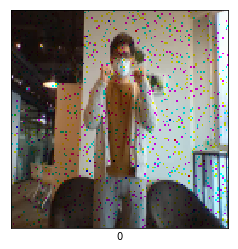

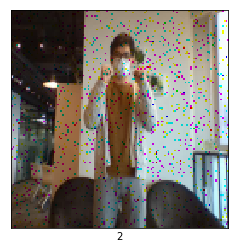

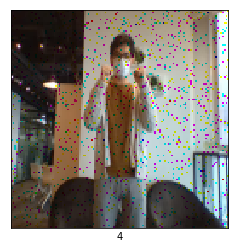

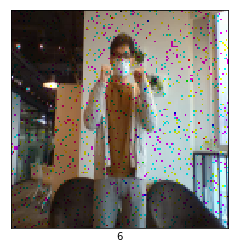

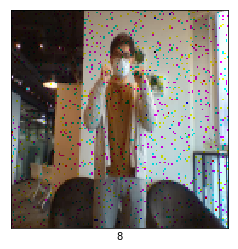

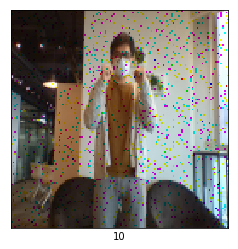

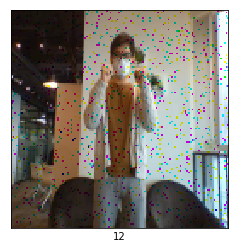

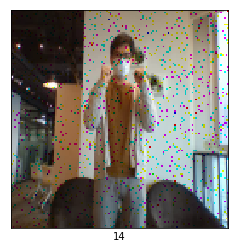

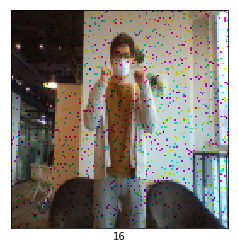

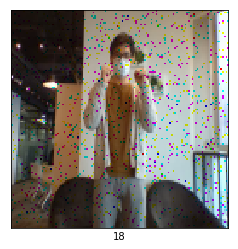

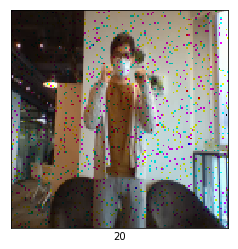

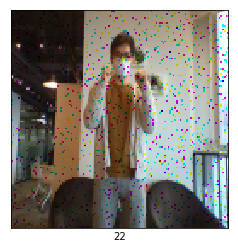

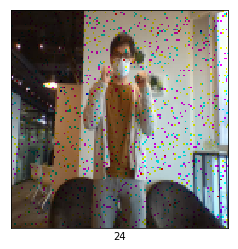

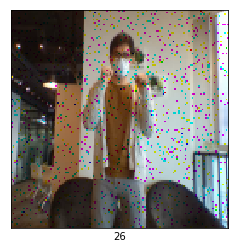

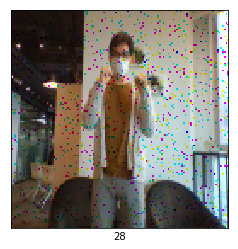

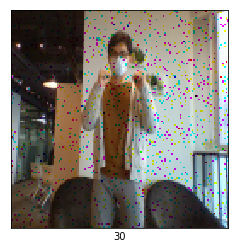

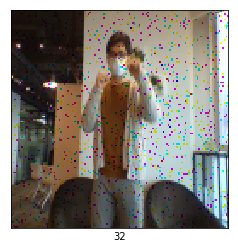

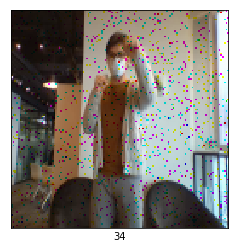

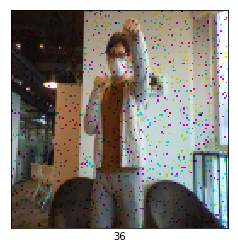

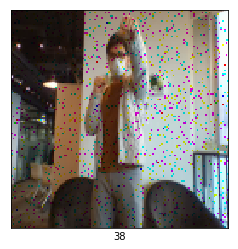

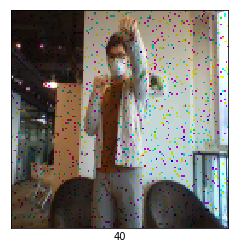

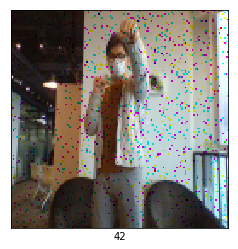

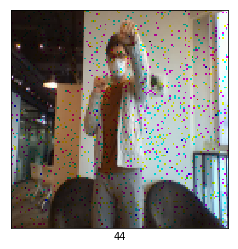

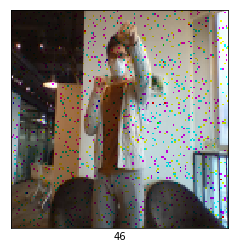

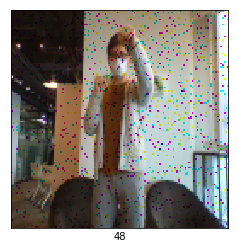

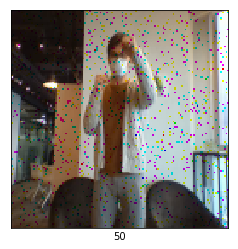

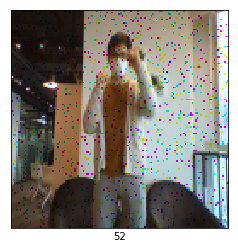

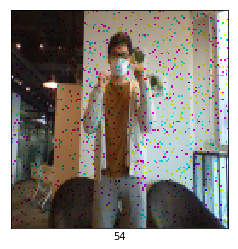

In [447]:
vid = video_pepper
for i in range(0,len(vid),2):
    plt.imshow(vid[i])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.xlabel(i)
    plt.show()

In [ ]:
# save augmentad frames as gif 
video_aug[0].save("out.gif", save_all=True, append_images=video_aug[1:], duration=100, loop=0)
